In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_palette("RdBu_r")

In [2]:
raw_train_df=pd.read_csv('Dataset/train.csv')
raw_test_df=pd.read_csv('Dataset/test.csv')

# Exploratory Data Analysis

In [3]:
raw_train_df

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0        > 2 Years            Yes         40454.0                  26.0   
1         1-2 Year             No         33536.0                  26.0   
2        > 2 Years            Yes         38294.0                  26.0   
3         < 1 Year             No         28619.0                 152.0   
4         < 1 Year             No         27496.0                 152.0   
...            ...            ...             ...                   ...   
381104    1-2 Year             No         30170.0                  26.0   
381105    < 1 Year             No         40016.0                 152.0   
381106    < 1 Year             No         35118.0                 160.0   
381107   > 2 Years            Yes         44617.0                 124.0   
381108    1-2 Year             No         41777.0                  26.0   

        Vintage  Response  
0           217         1  
1           183         0  
2            27         1  
3           203         0  
4            39         0  
...         ...       ...  
381104       88         0  
381105      131         0  
381106      161         0  
381107       74         0  
381108      237         0  

[381109 rows x 12 columns]

In [4]:
raw_test_df

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       381110    Male   25                1         11.0                   1   
1       381111    Male   40                1         28.0                   0   
2       381112    Male   47                1         28.0                   0   
3       381113    Male   24                1         27.0                   1   
4       381114    Male   27                1         28.0                   1   
...        ...     ...  ...              ...          ...                 ...   
127032  508142  Female   26                1         37.0                   1   
127033  508143  Female   38                1         28.0                   0   
127034  508144    Male   21                1         46.0                   1   
127035  508145    Male   71                1         28.0                   1   
127036  508146    Male   41                1         29.0                   1   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0         < 1 Year             No         35786.0                 152.0   
1         1-2 Year            Yes         33762.0                   7.0   
2         1-2 Year            Yes         40050.0                 124.0   
3         < 1 Year            Yes         37356.0                 152.0   
4         < 1 Year             No         59097.0                 152.0   
...            ...            ...             ...                   ...   
127032    < 1 Year             No         30867.0                 152.0   
127033    1-2 Year            Yes         28700.0                 122.0   
127034    < 1 Year             No         29802.0                 152.0   
127035    1-2 Year             No         62875.0                  26.0   
127036    1-2 Year             No         27927.0                 124.0   

        Vintage  
0            53  
1           111  
2           199  
3           187  
4           297  
...         ...  
127032       56  
127033      165  
127034       74  
127035      265  
127036      231  

[127037 rows x 11 columns]

In [5]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
raw_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [7]:
raw_train_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
raw_train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
raw_test_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [10]:
raw_test_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [11]:
raw_test_df.nunique()

id                      127037
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           36327
Policy_Sales_Channel       145
Vintage                    290
dtype: int64

In [12]:
raw_train_df.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

In [13]:
raw_train_df.describe(include=['object'])

Gender Vehicle_Age Vehicle_Damage
count   381109      381109         381109
unique       2           3              2
top       Male    1-2 Year            Yes
freq    206089      200316         192413

# Vizualization Of Data

In [14]:
fig=px.histogram(raw_train_df,
                x='Response',
                marginal='box',
                color='Gender',
                color_discrete_sequence=['#6666FF', '#FF99FF'],
                title='Gender and Response Correlation'
                )
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
sns.catplot(x="Response",y="Age", data=raw_train_df, kind='box')
plt.title("Age and Response Correlation", size=20, y=1.0);

In [16]:
fig=px.histogram(raw_train_df,
                x='Response',
                marginal='box',
                color='Driving_License',
                color_discrete_sequence=['#6666FF', '#FF99FF'],
                title='Driving License and Response Correlation'
                )
fig.update_layout(bargap=0.1)
fig.show()

In [17]:
sns.catplot(x="Response", y="Region_Code", data=raw_train_df, kind="box")
plt.title("Region code and Response Correlation", size=20, y=1.0)

Text(0.5, 1.0, 'Region code and Response Correlation')

In [18]:
sns.catplot(x="Response", y="Vintage", data=raw_train_df, kind="box")
plt.title("Vintage code and Response Correlation", size=20, y=1.0);

In [19]:
fig=px.histogram(raw_train_df,
                x='Response',
                marginal='box',
                color='Vehicle_Damage',
                color_discrete_sequence=['#6666FF', '#FF99FF'],
                title='Vehicle_Damage and Response Correlation'
                )
fig.update_layout(bargap=0.1)
fig.show()

In [20]:
sns.countplot(data=raw_train_df,x='Vehicle_Age',hue='Vehicle_Damage');

In [21]:
corr_data=raw_train_df.drop(['id'], inplace=False, axis=1)

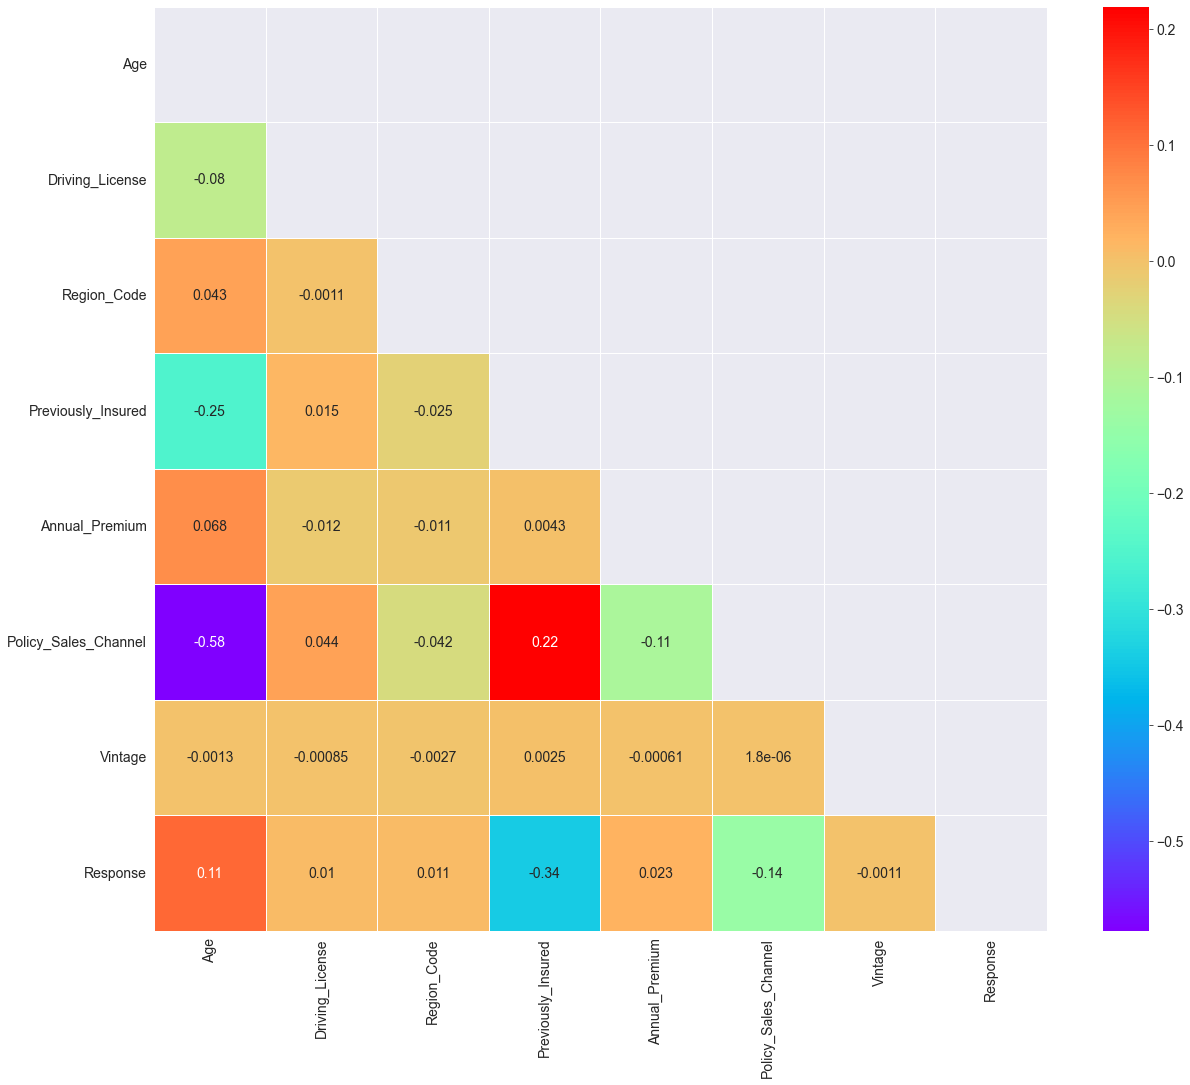

In [22]:
plt.figure(figsize=(20, 17))
matrix = np.triu(corr_data.corr())
sns.heatmap(corr_data.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rainbow");

# Data Preprocessing

In [23]:
raw_train_df.drop("id", inplace=True, axis=1)
raw_test_df.drop("id",inplace=True, axis=1)

In [24]:
raw_train_df['Gender']=raw_train_df['Gender'].replace({'Male':1,'Female':0})
raw_train_df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0       1   44                1         28.0                   0   > 2 Years   
1       1   76                1          3.0                   0    1-2 Year   
2       1   47                1         28.0                   0   > 2 Years   
3       1   21                1         11.0                   1    < 1 Year   
4       0   29                1         41.0                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes         40454.0                  26.0      217         1  
1             No         33536.0                  26.0      183         0  
2            Yes         38294.0                  26.0       27         1  
3             No         28619.0                 152.0      203         0  
4             No         27496.0                 152.0       39         0

In [25]:
raw_train_df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [26]:
raw_train_df['Vehicle_Damage'].replace({'Yes':1,'No':0}, inplace=True)
raw_train_df['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3}, inplace=True)
raw_train_df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       1   44                1         28.0                   0            3   
1       1   76                1          3.0                   0            2   
2       1   47                1         28.0                   0            3   
3       1   21                1         11.0                   1            1   
4       0   29                1         41.0                   1            1   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0               1         40454.0                  26.0      217         1  
1               0         33536.0                  26.0      183         0  
2               1         38294.0                  26.0       27         1  
3               0         28619.0                 152.0      203         0  
4               0         27496.0                 152.0       39         0

In [27]:
train_df=raw_train_df

<AxesSubplot:>

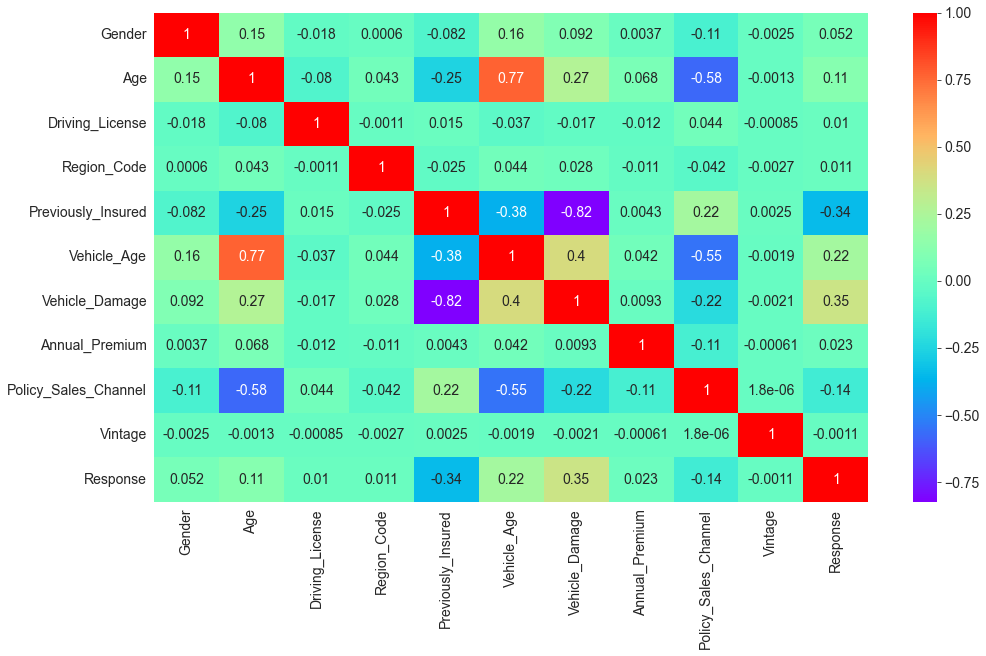

In [28]:
plt.figure(figsize=(16,9))
sns.heatmap(train_df.corr(),  cmap="rainbow", annot=True)

In [29]:
hig_corr = train_df.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Response"]) >= 0.2]
hig_corr_features

Index(['Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response'], dtype='object')

In [30]:
raw_test_df['Gender']=raw_test_df['Gender'].replace({'Male':1,'Female':0})

In [31]:
raw_test_df['Vehicle_Damage'].replace({'Yes':1,'No':0}, inplace=True)
raw_test_df['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3}, inplace=True)

In [32]:
test_df=raw_test_df
test_df

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1   25                1         11.0                   1   
1            1   40                1         28.0                   0   
2            1   47                1         28.0                   0   
3            1   24                1         27.0                   1   
4            1   27                1         28.0                   1   
...        ...  ...              ...          ...                 ...   
127032       0   26                1         37.0                   1   
127033       0   38                1         28.0                   0   
127034       1   21                1         46.0                   1   
127035       1   71                1         28.0                   1   
127036       1   41                1         29.0                   1   

        Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0                 1               0         35786.0                 152.0   
1                 2               1         33762.0                   7.0   
2                 2               1         40050.0                 124.0   
3                 1               1         37356.0                 152.0   
4                 1               0         59097.0                 152.0   
...             ...             ...             ...                   ...   
127032            1               0         30867.0                 152.0   
127033            2               1         28700.0                 122.0   
127034            1               0         29802.0                 152.0   
127035            2               0         62875.0                  26.0   
127036            2               0         27927.0                 124.0   

        Vintage  
0            53  
1           111  
2           199  
3           187  
4           297  
...         ...  
127032       56  
127033      165  
127034       74  
127035      265  
127036      231  

[127037 rows x 10 columns]

# Scaling Numeric Data

In [34]:
numeric_cols=['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler=MinMaxScaler()

In [38]:
scaler.fit(train_df[numeric_cols])

MinMaxScaler()

In [40]:
train_df[numeric_cols]=scaler.transform(train_df[numeric_cols])
test_df[numeric_cols]=scaler.transform(test_df[numeric_cols])

In [41]:
train_df.describe().loc[['min', 'max']]

Gender       Age  Driving_License  Region_Code  Previously_Insured  \
min     0.0 -0.307692              0.0     0.000000                 0.0   
max     1.0 -0.292308              1.0     0.019231                 1.0   

     Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
min          1.0             0.0       -0.004893             -0.006173   
max          3.0             1.0       -0.004891              0.000000   

      Vintage  Response  
min -0.034602       0.0  
max -0.031142       1.0

In [42]:
test_df.describe().loc[['min', 'max']]

Gender       Age  Driving_License  Region_Code  Previously_Insured  \
min     0.0 -0.307692              0.0     0.000000                 0.0   
max     1.0 -0.292308              1.0     0.019231                 1.0   

     Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
min          1.0             0.0       -0.004893             -0.006173   
max          3.0             1.0       -0.004891              0.000000   

      Vintage  
min -0.034602  
max -0.031142

In [43]:
train_df.head()

Gender       Age  Driving_License  Region_Code  Previously_Insured  \
0       1 -0.302012                1     0.010355                   0   
1       1 -0.294438                1     0.001109                   0   
2       1 -0.301302                1     0.010355                   0   
3       1 -0.307456                1     0.004068                   1   
4       0 -0.305562                1     0.015163                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0            3               1       -0.004893             -0.005220   
1            2               0       -0.004893             -0.005220   
2            3               1       -0.004893             -0.005220   
3            1               0       -0.004893             -0.000419   
4            1               0       -0.004893             -0.000419   

    Vintage  Response  
0 -0.032124         1  
1 -0.032531         0  
2 -0.034399         1  
3 -0.032291         0  
4 -0.034255         0

In [44]:
test_df.head()

Gender       Age  Driving_License  Region_Code  Previously_Insured  \
0       1 -0.306509                1     0.004068                   1   
1       1 -0.302959                1     0.010355                   0   
2       1 -0.301302                1     0.010355                   0   
3       1 -0.306746                1     0.009985                   1   
4       1 -0.306036                1     0.010355                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel   Vintage  
0            1               0       -0.004893             -0.000419 -0.034087  
1            2               1       -0.004893             -0.005944 -0.033393  
2            2               1       -0.004893             -0.001486 -0.032339  
3            1               1       -0.004893             -0.000419 -0.032483  
4            1               0       -0.004893             -0.000419 -0.031166

# Training, Validation and Test Data

In [45]:
input_cols=list(train_df.columns)[0:-1]
target_col='Response'

In [46]:
inputs=train_df[input_cols]
targets=train_df[target_col]


In [47]:
res_col_counts = train_df[target_col].value_counts()

In [48]:
per = res_col_counts[1]/res_col_counts.sum()*100
print(per)

12.256336113815209


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
train_inputs, val_inputs, train_targets,val_targets=train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [51]:
val_inputs.head()

Gender       Age  Driving_License  Region_Code  Previously_Insured  \
200222       0 -0.307456                1     0.001109                   1   
49766        1 -0.299408                1     0.005547                   0   
172201       0 -0.302722                1     0.001109                   0   
160713       0 -0.306272                1     0.004068                   0   
53272        1 -0.300355                1     0.014793                   0   

        Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
200222            1               0       -0.004893             -0.000114   
49766             2               1       -0.004893             -0.005220   
172201            2               1       -0.004893             -0.005220   
160713            1               0       -0.004893             -0.000457   
53272             2               1       -0.004893             -0.001486   

         Vintage  
200222 -0.033860  
49766  -0.033501  
172201 -0.033644  
160713 -0.031513  
53272  -0.031549

In [52]:
len(val_inputs)

76222

In [53]:
len(val_targets)

76222

# Logistic Regression Model

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

In [55]:
model=LogisticRegression(solver='liblinear')

In [56]:
model.fit(train_inputs, train_targets)

LogisticRegression(solver='liblinear')

In [57]:
%%time
train_preds=model.predict(train_inputs)
train_probs=model.predict_proba(train_inputs)
accuracy_score(train_targets, train_preds)

CPU times: user 65.8 ms, sys: 24.6 ms, total: 90.4 ms
Wall time: 26.1 ms


0.8780302210327104

In [58]:
from sklearn.metrics import confusion_matrix
def predict_and_plot(inputs, targets,name=''):
    preds=model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap="Blues")
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

Accuracy: 87.80%
CPU times: user 191 ms, sys: 98.5 ms, total: 289 ms
Wall time: 77 ms


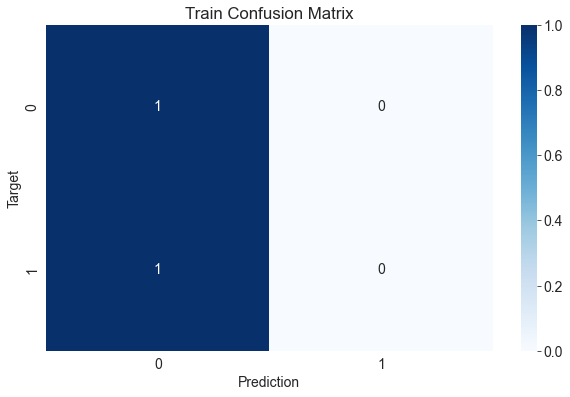

In [59]:
%%time
train_preds=predict_and_plot(train_inputs, train_targets,'Train')

Accuracy: 87.51%
CPU times: user 465 ms, sys: 226 ms, total: 691 ms
Wall time: 169 ms


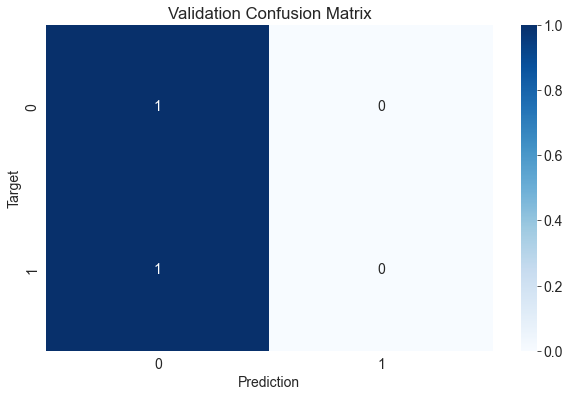

In [60]:
%%time
val_preds=predict_and_plot(val_inputs, val_targets,'Validation')

# Random Forest Classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
model_2=RandomForestClassifier(n_jobs=-1, random_state=42)

In [95]:
model_2.fit(train_inputs, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [96]:
%%time
model_2.score(train_inputs, train_targets)

CPU times: user 4.04 s, sys: 33.9 ms, total: 4.08 s
Wall time: 682 ms


0.9120493822301378

In [97]:
from sklearn.metrics import confusion_matrix
def predict_and_plot_2(inputs, targets,name=''):
    preds=model_2.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap="Blues")
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

In [98]:
%%time
val_preds_2 = predict_and_plot_2(val_inputs, val_targets, 'Validation')

Accuracy: 87.35%
CPU times: user 1.12 s, sys: 26.9 ms, total: 1.14 s
Wall time: 230 ms


In [99]:
model_2_all = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=100,
                               max_features=6)

In [100]:
model_2_all.fit(train_inputs,train_targets)
print("Training Accuracy = ",model_2_all.score(train_inputs, train_targets))
print("Validation Accuracy = ",model_2_all.score(val_inputs, val_targets)) 

Training Accuracy =  0.983551282934333
Validation Accuracy =  0.8562619716092467


# Decision Tree Classifier

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
model_3=DecisionTreeClassifier(random_state=42)

In [103]:
model_3.fit(train_inputs, train_targets)

DecisionTreeClassifier(random_state=42)

In [104]:
%%time
train_preds_3=model_3.predict(train_inputs)
train_probs_3=model_3.predict_proba(train_inputs)
accuracy_score(train_targets, train_preds_3)

CPU times: user 121 ms, sys: 3.78 ms, total: 125 ms
Wall time: 123 ms


0.9874248492064273

In [105]:
def predict_and_plot_3(inputs, targets, name=''):
    preds = model_3.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap="Blues")
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

In [106]:
%%time
val_preds = predict_and_plot_3(val_inputs, val_targets, 'Validation')

Accuracy: 82.53%
CPU times: user 61.8 ms, sys: 1.94 ms, total: 63.7 ms
Wall time: 62.5 ms


In [107]:
from sklearn.tree import plot_tree, export_text

In [108]:
plt.figure(figsize=(100,20))
plot_tree(model_3, feature_names=train_inputs.columns, max_depth=3, filled=True)

[Text(0.5, 0.9, 'Vehicle_Damage <= 0.5\ngini = 0.214\nsamples = 304887\nvalue = [267700, 37187]'),
 Text(0.25, 0.7, 'Previously_Insured <= 0.5\ngini = 0.01\nsamples = 150950\nvalue = [150165, 785]'),
 Text(0.125, 0.5, 'Policy_Sales_Channel <= -0.0\ngini = 0.073\nsamples = 19130\nvalue = [18405, 725]'),
 Text(0.0625, 0.3, 'Age <= -0.298\ngini = 0.059\nsamples = 16165\nvalue = [15676, 489]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Policy_Sales_Channel <= -0.0\ngini = 0.147\nsamples = 2965\nvalue = [2729, 236]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Age <= -0.305\ngini = 0.001\nsamples = 131820\nvalue = [131760, 60]'),
 Text(0.3125, 0.3, 'Region_Code <= 0.001\ngini = 0.001\nsamples = 84849\nvalue = [84826, 23]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Policy_Sales_Channel <= -0.0\ngini = 0.002\nsamples = 46971\nvalue = 

In [109]:
model_3_text=export_text(model_3, feature_names=list(train_inputs.columns))
print(model_3_text[:3000])

|--- Vehicle_Damage <= 0.50
|   |--- Previously_Insured <= 0.50
|   |   |--- Policy_Sales_Channel <= -0.00
|   |   |   |--- Age <= -0.30
|   |   |   |   |--- Policy_Sales_Channel <= -0.00
|   |   |   |   |   |--- Age <= -0.30
|   |   |   |   |   |   |--- Policy_Sales_Channel <= -0.00
|   |   |   |   |   |   |   |--- Region_Code <= 0.02
|   |   |   |   |   |   |   |   |--- Annual_Premium <= -0.00
|   |   |   |   |   |   |   |   |   |--- Age <= -0.31
|   |   |   |   |   |   |   |   |   |   |--- Vintage <= -0.03
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- Vintage >  -0.03
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- Age >  -0.31
|   |   |   |   |   |   |   |   |   |   |--- Vintage <= -0.03
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 19
|   |   |   |   |   |   |   |   |   |   |--- Vintage >  -0.03
|   |   |   |   |   |   |   |   

In [110]:
model_3.feature_importances_

array([0.03638645, 0.1728771 , 0.00076227, 0.14087327, 0.01343902,
       0.01134801, 0.13349635, 0.0245425 , 0.05431663, 0.41195841])

In [111]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model_3.feature_importances_
}).sort_values('importance', ascending=False)

In [112]:
importance_df

feature  importance
9               Vintage    0.411958
1                   Age    0.172877
3           Region_Code    0.140873
6        Vehicle_Damage    0.133496
8  Policy_Sales_Channel    0.054317
0                Gender    0.036386
7        Annual_Premium    0.024543
4    Previously_Insured    0.013439
5           Vehicle_Age    0.011348
2       Driving_License    0.000762

# SMOTE

In [113]:
targets = train_df['Response'].value_counts()
print(targets)
print('Percentage of Positive class - %.0f'%(targets[1]/(targets.sum())*100), '%')

0    334399
1     46710
Name: Response, dtype: int64
Percentage of Positive class - 12 %


In [114]:
inputs.head()

Gender       Age  Driving_License  Region_Code  Previously_Insured  \
0       1 -0.302012                1     0.010355                   0   
1       1 -0.294438                1     0.001109                   0   
2       1 -0.301302                1     0.010355                   0   
3       1 -0.307456                1     0.004068                   1   
4       0 -0.305562                1     0.015163                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel   Vintage  
0            3               1       -0.004893             -0.005220 -0.032124  
1            2               0       -0.004893             -0.005220 -0.032531  
2            3               1       -0.004893             -0.005220 -0.034399  
3            1               0       -0.004893             -0.000419 -0.032291  
4            1               0       -0.004893             -0.000419 -0.034255

In [115]:
targets.head()

0    334399
1     46710
Name: Response, dtype: int64

In [116]:
from imblearn.over_sampling import SMOTE
SEED = 1970
ovrsmpl = SMOTE(n_jobs=-1, k_neighbors=5, random_state = SEED)
X_balanced, y_balanced = ovrsmpl.fit_resample(train_df.drop(['Response'], axis=1), train_df['Response'])
# sanity check
print(X_balanced.shape)
X_balanced.head()

(668798, 10)


Gender       Age  Driving_License  Region_Code  Previously_Insured  \
0       1 -0.302012                1     0.010355                   0   
1       1 -0.294438                1     0.001109                   0   
2       1 -0.301302                1     0.010355                   0   
3       1 -0.307456                1     0.004068                   1   
4       0 -0.305562                1     0.015163                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel   Vintage  
0            3               1       -0.004893             -0.005220 -0.032124  
1            2               0       -0.004893             -0.005220 -0.032531  
2            3               1       -0.004893             -0.005220 -0.034399  
3            1               0       -0.004893             -0.000419 -0.032291  
4            1               0       -0.004893             -0.000419 -0.034255

In [117]:
X_train, X_valid, y_train, y_valid = train_test_split(X_balanced, y_balanced, train_size=0.8, random_state = SEED)

In [118]:
import sklearn
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
def plot_ROC(fpr, tpr, m_name):
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    lw = 1
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Receiver operating characteristic for %s'%m_name, fontsize=20)
    plt.legend(loc="lower right", fontsize=16)
    plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
import scikitplot as skplt
def predict_display(df,target):
    rfc_preds_proba = rfc.predict_proba(df)
    rfc_pred = rfc.predict(df)
    rfc_preds_proba = rfc.predict_proba(df)
    rfc_score = roc_auc_score(target, rfc_preds_proba[:,1])
    (fpr, tpr, thresholds) = roc_curve(target, rfc_preds_proba[:,1])
    plot_ROC(fpr, tpr,'RandomForestClassifier')
    print('ROC AUC score for RandomForestClassifier model with over-sampling: %.4f'%rfc_score)
    print('F1 score: %0.4f'%f1_score(target, rfc_pred))
    print(f"Accuracy score is {100*accuracy_score(target,rfc_pred).round(2)}")
    skplt.metrics.plot_confusion_matrix(target, rfc_pred,figsize=(6,6))

ROC AUC score for RandomForestClassifier model with over-sampling: 0.9495
F1 score: 0.8762
Accuracy score is 87.0


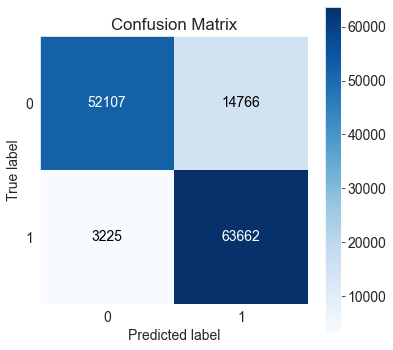

In [121]:
predict_display(X_valid, y_valid)

In [122]:
rfc_preds_proba = rfc.predict_proba(test_df)
rfc_pred = rfc.predict(test_df)
rfc_preds_proba = rfc.predict_proba(test_df)
print(rfc_pred)
print(rfc_preds_proba)

[0 1 1 ... 0 0 0]
[[9.99381178e-01 6.18822134e-04]
 [2.96924491e-01 7.03075509e-01]
 [2.97349054e-01 7.02650946e-01]
 ...
 [9.99935500e-01 6.44996618e-05]
 [9.99940068e-01 5.99318187e-05]
 [9.97284868e-01 2.71513236e-03]]


# Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

In [126]:
lr=LogisticRegression(solver='liblinear')

In [127]:
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
import scikitplot as skplt
def predict_display(df,target):
    lr_preds_proba = lr.predict_proba(df)
    lr_pred = lr.predict(df)
    lr_preds_proba = lr.predict_proba(df)
    lr_score = roc_auc_score(target, lr_preds_proba[:,1])
    (fpr, tpr, thresholds) = roc_curve(target, lr_preds_proba[:,1])
    plot_ROC(fpr, tpr,'Logistic Regression')
    print('ROC AUC score for Logistic Regression model with over-sampling: %.4f'%lr_score)
    print('F1 score: %0.4f'%f1_score(target, lr_pred))
    print(f"Accuracy score is {100*accuracy_score(target,lr_pred).round(2)}")
    skplt.metrics.plot_confusion_matrix(target, lr_pred,figsize=(6,6))

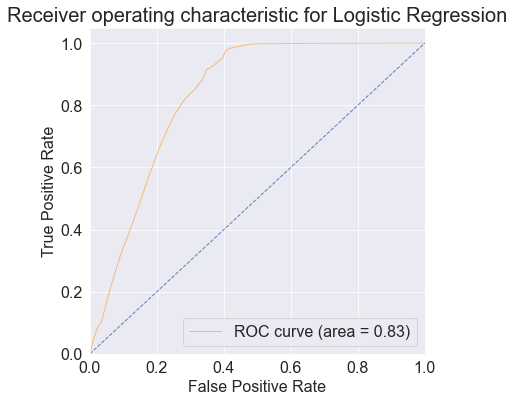

ROC AUC score for Logistic Regression model with over-sampling: 0.8307
F1 score: 0.8199
Accuracy score is 79.0


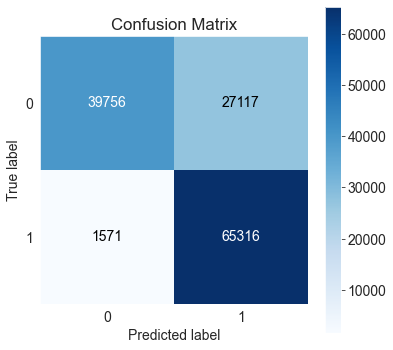

In [129]:
predict_display(X_valid, y_valid)

In [130]:
lr_preds_proba = lr.predict_proba(test_df)
lr_pred = lr.predict(test_df)
lr_preds_proba = lr.predict_proba(test_df)
print(lr_pred)
print(lr_preds_proba)

[0 1 1 ... 0 0 0]
[[0.99617446 0.00382554]
 [0.26203105 0.73796895]
 [0.27901046 0.72098954]
 ...
 [0.99614342 0.00385658]
 [0.99430882 0.00569118]
 [0.99362807 0.00637193]]


# Decision Tree Classifier

In [131]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
dtc=DecisionTreeClassifier(random_state=42)

In [133]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [134]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
import scikitplot as skplt
def predict_display(df,target):
    dtc_preds_proba = dtc.predict_proba(df)
    dtc_pred = dtc.predict(df)
    dtc_preds_proba = dtc.predict_proba(df)
    dtc_score = roc_auc_score(target, dtc_preds_proba[:,1])
    (fpr, tpr, thresholds) = roc_curve(target, dtc_preds_proba[:,1])
    plot_ROC(fpr, tpr,'Decision Tree Classifier')
    print('ROC AUC score for Decision Tree Classifier model with over-sampling: %.4f'%dtc_score)
    print('F1 score: %0.4f'%f1_score(target, dtc_pred))
    print(f"Accuracy score is {100*accuracy_score(target,dtc_pred).round(2)}")
    skplt.metrics.plot_confusion_matrix(target, dtc_pred,figsize=(6,6))

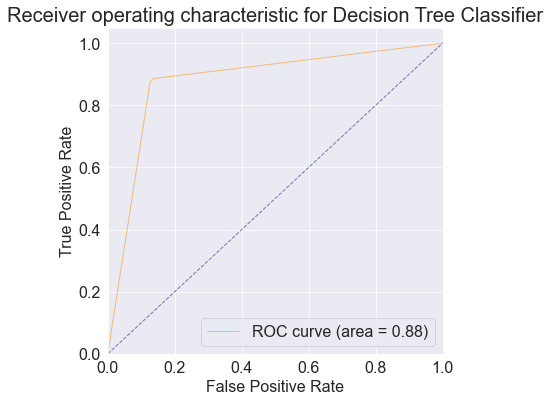

ROC AUC score for Decision Tree Classifier model with over-sampling: 0.8785
F1 score: 0.8746
Accuracy score is 87.0


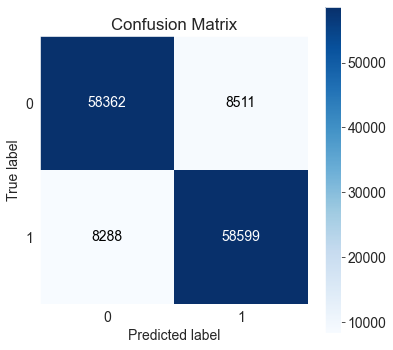

In [135]:
predict_display(X_valid, y_valid)

[Text(0.5, 0.9, 'Vehicle_Damage <= 0.5\ngini = 0.5\nsamples = 535038\nvalue = [267526, 267512]'),
 Text(0.25, 0.7, 'Previously_Insured <= 0.5\ngini = 0.069\nsamples = 155575\nvalue = [149997, 5578]'),
 Text(0.125, 0.5, 'Policy_Sales_Channel <= -0.0\ngini = 0.341\nsamples = 23665\nvalue = [18501, 5164]'),
 Text(0.0625, 0.3, 'Age <= -0.298\ngini = 0.296\nsamples = 19241\nvalue = [15773, 3468]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Policy_Sales_Channel <= -0.0\ngini = 0.473\nsamples = 4424\nvalue = [2728, 1696]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Age <= -0.306\ngini = 0.006\nsamples = 131910\nvalue = [131496, 414]'),
 Text(0.3125, 0.3, 'Age <= -0.307\ngini = 0.004\nsamples = 78531\nvalue = [78385, 146]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Age <= -0.305\ngini = 0.01\nsamples = 53379\nvalue = [53111, 268]'),
 

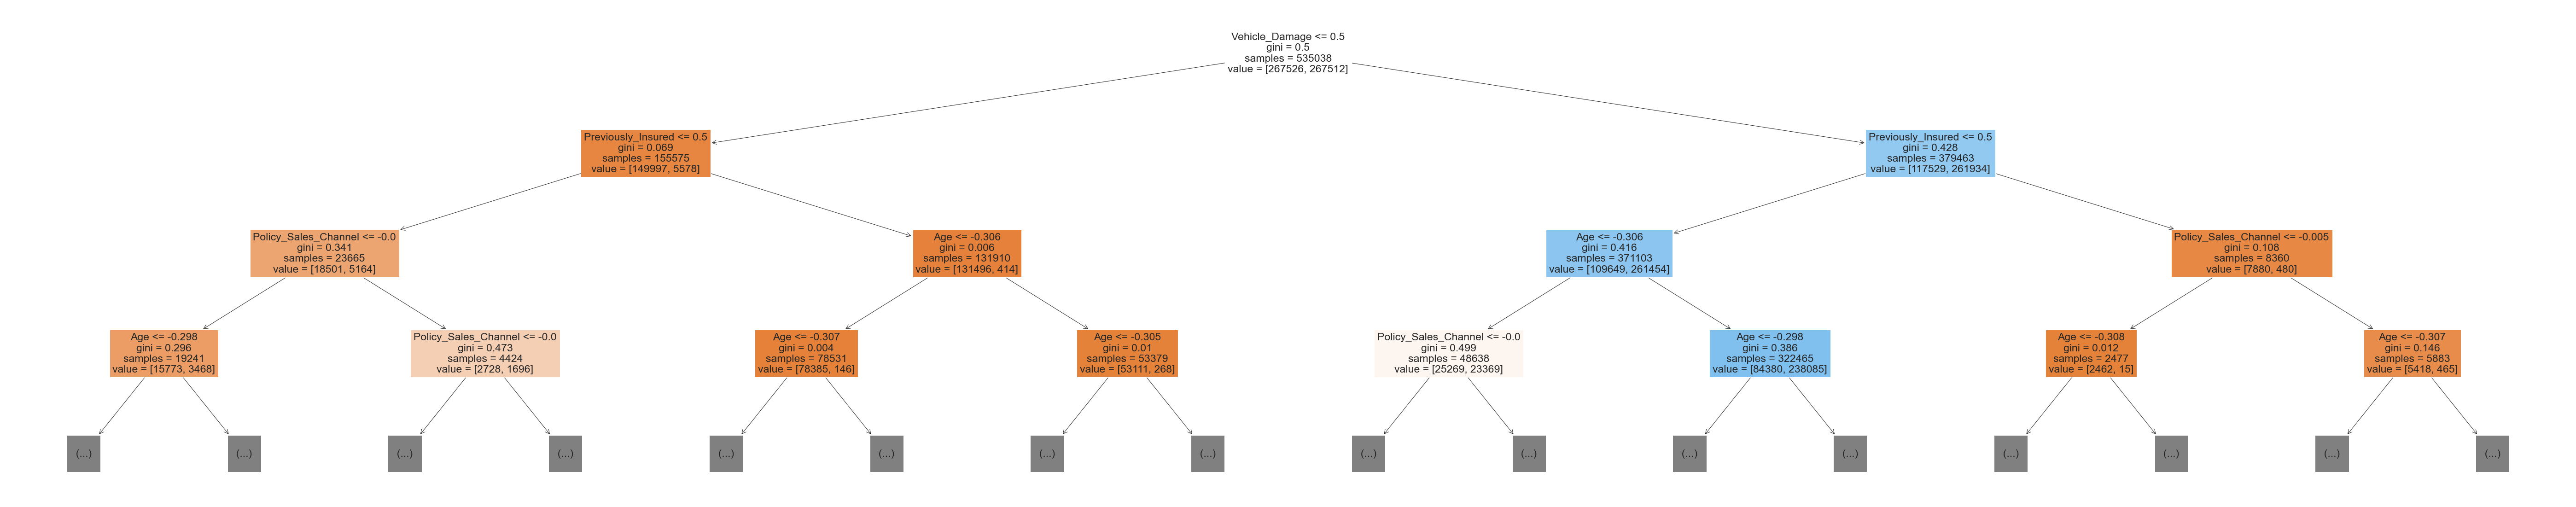

In [137]:
plt.figure(figsize=(100,20))
plot_tree(dtc, feature_names=X_train.columns, max_depth=3, filled=True)

In [138]:
dtc_text=export_text(dtc, feature_names=list(X_train.columns))
print(dtc_text[:3000])

|--- Vehicle_Damage <= 0.50
|   |--- Previously_Insured <= 0.50
|   |   |--- Policy_Sales_Channel <= -0.00
|   |   |   |--- Age <= -0.30
|   |   |   |   |--- Policy_Sales_Channel <= -0.00
|   |   |   |   |   |--- Policy_Sales_Channel <= -0.00
|   |   |   |   |   |   |--- Age <= -0.30
|   |   |   |   |   |   |   |--- Age <= -0.30
|   |   |   |   |   |   |   |   |--- Age <= -0.31
|   |   |   |   |   |   |   |   |   |--- Policy_Sales_Channel <= -0.00
|   |   |   |   |   |   |   |   |   |   |--- Age <= -0.31
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- Age >  -0.31
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |--- Policy_Sales_Channel >  -0.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Age >  -0.31
|   |   |   |   |   |   |   |   |   |--- Age <= -0.30
|   |   |   |   |   |   |   |   |   |   |--- Age 

In [136]:
dtc_preds_proba = dtc.predict_proba(test_df)
dtc_pred = dtc.predict(test_df)
dtc_preds_proba = dtc.predict_proba(test_df)
print(dtc_pred)
print(dtc_preds_proba)

[0 0 0 ... 0 0 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
